<a href="https://colab.research.google.com/github/KSrimanNarayana/Time-Series-Forecasting/blob/main/AD_Ease_BCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What ADEase Do?

Ad Ease is a Ad and Markerting based company. helping businesses elicit maximum clicks @ minimum cost.

 AdEase is an ad infrastructure to help businesses promote themselves easily, effectively, and economically.

  The interplay of 3 AI modules - Design, Dispense, and Decipher, come together to make it this an end-to-end 3 step process digital advertising solution for all.

Problem Statement:

The Data Science team of Ad ease trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that you can predict and optimize the ad placement for your clients.

Data Context:

You are provided with the data of 145k wikipedia pages and daily view count for each of them. Your clients belong to different regions and need data on how their ads will perform on pages in different languages.

Business Context:

To understand the per page view report for different wikipedia pages for 550 days.

To forecast the number of views to predict and optimize the ad placement for clients.

To provide clients (different regions) with data on how their ads will perform on pages in different languages.

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import re

In [77]:
#Intital Pandas and Matplotlib setup

pd.options.display.max_columns = 600
pd.options.display.max_rows = 200
pd.options.display.max_colwidth = 200

np.set_printoptions(precision=2,suppress=True)

#to suppress scientific notations
pd.options.display.float_format = '{:.2f}'.format

#rcParams (runtime configuration parameters)
plt.rcParams["figure.figsize"]==(20,6)

import warnings
warnings.simplefilter(action='ignore',category = FutureWarning)


In [78]:
web_pages = pd.read_csv('train_1.csv')

web_pages.head()

Page  2015-07-01  \
0              2NE1_zh.wikipedia.org_all-access_spider       18.00   
1               2PM_zh.wikipedia.org_all-access_spider       11.00   
2                3C_zh.wikipedia.org_all-access_spider        1.00   
3           4minute_zh.wikipedia.org_all-access_spider       35.00   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider         NaN   

   2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  \
0       11.00        5.00       13.00       14.00        9.00        9.00   
1       14.00       15.00       18.00       11.00       13.00       22.00   
2        0.00        1.00        1.00        0.00        4.00        0.00   
3       13.00       10.00       94.00        4.00       26.00       14.00   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-08  2015-07-09  2015-07-10  2015-07-11  2015-07-12  2015-07-13  \
0       22.00       26.00       24.00       19.00       10.00       14.00   
1       11.00       10.00        4.00       41.00       65.00       57.00   
2        3.00        4.00        4.00        1.00        1.00        1.00   
3        9.00       11.00       16.00       16.00       11.00       23.00   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-14  2015-07-15  2015-07-16  2015-07-17  2015-07-18  2015-07-19  \
0       15.00        8.00       16.00        8.00        8.00       16.00   
1       38.00       20.00       62.00       44.00       15.00       10.00   
2        6.00        8.00        6.00        4.00        5.00        1.00   
3      145.00       14.00       17.00       85.00        4.00       30.00   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-20  2015-07-21  2015-07-22  2015-07-23  2015-07-24  2015-07-25  \
0        7.00       11.00       10.00       20.00       18.00       15.00   
1       47.00       24.00       17.00       22.00        9.00       39.00   
2        2.00        3.00        8.00        8.00        6.00        6.00   
3       22.00        9.00       10.00       11.00        7.00        7.00   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-26  2015-07-27  2015-07-28  2015-07-29  2015-07-30  2015-07-31  \
0       14.00       49.00       10.00       16.00       18.00        8.00   
1       13.00       11.00       12.00       21.00       19.00        9.00   
2        2.00        2.00        3.00        2.00        4.00        3.00   
3       11.00        9.00       11.00       44.00        8.00       14.00   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-08-01  2015-08-02  2015-08-03  2015-08-04  2015-08-05  2015-08-06  \
0        5.00        9.00        7.00       13.00        9.00        7.00   
1       15.00       33.00        8.00        8.00        7.00       13.00   
2        3.00        5.00        3.00        5.00        4.00        2.00   
3       19.00       10.00       17.00       17.00       10.00        7.00   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-08-07  2015-08-08  2015-08-09  2015-08-10  2015-08-11  2015-08-12  \
0        4.00       11.00       10.00        5.00        9.00        9.00   
1        2.00       23.00       12.00       27.00       27.00       36.00   
2        5.00        1.00        4.00        5.00        0.00        0.00   
3       10.00        1.00        8.00       27.00       19.00       16.00   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-08-13  2015-08-14  2015-08-15  2015-08-16  2015-08-17  2015-08-18  \
0        9.00        9.00       13.00        4.00       15.00       25.00   
1       23.00       58.00       80.00       60.00       69.00       42.00   
2        7.00        3.00        5.00        1.00        6.00        2.00   
3        2.00       84.00       22.00       14.00       47.00       25.00   
4  

In [79]:
web_pages.tail()

Page  \
145058                        Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider   
145059                          Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-access_spider   
145060                                  Enamorándome_de_Ramón_es.wikipedia.org_all-access_spider   
145061                                 Hasta_el_último_hombre_es.wikipedia.org_all-access_spider   
145062  Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider   

        2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  \
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-07-06  2015-07-07  2015-07-08  2015-07-09  2015-07-10  \
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-07-11  2015-07-12  2015-07-13  2015-07-14  2015-07-15  \
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-07-16  2015-07-17  2015-07-18  2015-07-19  2015-07-20  \
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-07-21  2015-07-22  2015-07-23  2015-07-24  2015-07-25  \
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-07-26  2015-07-27  2015-07-28  2015-07-29  2015-07-30  \
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-07-31  2015-08-01  2015-08-02  2015-08-03  2015-08-04  \
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-08-05  2015-08-06  2015-08-07  2015-08-08  2015-08-09  \
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-08-10  2015-08-11  2015-08-12  2015-08-13  2015-08-14  \
145058         NaN         NaN         NaN         Na

In [80]:
#shallow copy
df = web_pages.copy()
df.shape

(145063, 551)

The dataset contains 145K wikipedia pages and thier view counts as values for 550 days

In [81]:
df.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=551)

we have total 551 columns/features


In [82]:
columns = df.columns.to_list()
print(f"Start Date  {min(columns)}",f"End   Date  {max(columns[1:])}",sep='\n')

Start Date  2015-07-01
End   Date  2016-12-31


we have the data from 2015 July 1st to 2016 december 31st of frequency daily for 550 days.

**Insights:**

There are 550 days of per day views data for roughly 145,000 pages from different languages

We have per day view data starting from 2015-07-01 till 2016-12-31

In [83]:
#Load the exogenous varaible
exog = pd.read_csv('Exog_Campaign_eng.csv')

exog.head()

Exog
0     0
1     0
2     0
3     0
4     0

In [84]:
exog.shape

(550, 1)

In [85]:
exog.value_counts()

Exog
0       496
1        54
Name: count, dtype: int64

We can see thier are 54 english Campaign are happend between the period 2015-07-01 and 2016-12-31

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [87]:
#null values
df.isna().sum()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

In [88]:
# Let's find max percentage of null values
np.round(100*(df.isna().sum()/df.shape[0]).max())

14.0

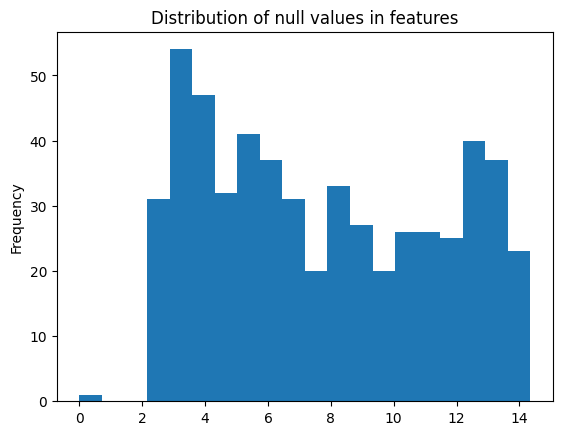

In [89]:
# let's plot the distribution of null values
(100*df.isna().sum()/df.shape[0]).plot(kind='hist',bins=20)
plt.title("Distribution of null values in features")
plt.show()

**Insights:**

There is one feature of object type and rest 550 features are float type

Maximum percentage of null values in a feature is ~14%

Above shows the histogram of %null values in different columns


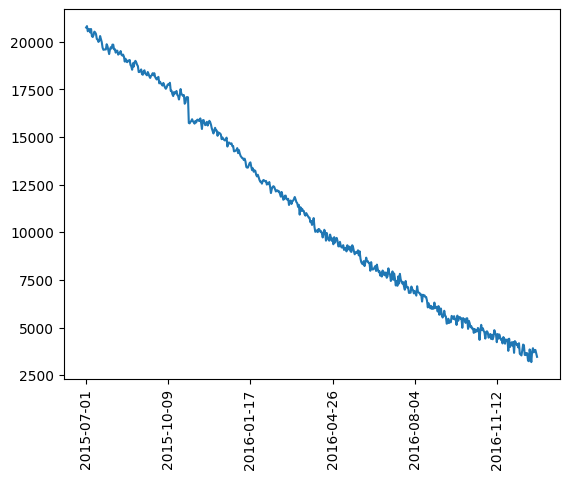

In [90]:
#Null values for different dates
df.iloc[:,1:].isna().sum().plot()
plt.xticks(rotation =90)
plt.show()

**Insights:**

The plot shows that none of the pages have recorded view data since 2015-07-01.

As we move closer to 2016, the number of null values decreases.

This could indicate various possibilities: data was not captured, the pages did not exist during those periods, or there were no visitors on those days.

for this analysis, I will perform the interpolation using forward method so that intail null values remains as null.

In [91]:
#Duplicate rows

df.duplicated().value_counts()

False    145063
Name: count, dtype: int64

**Insights:**

No duplicated roows in Datasets

In [92]:
#checking for any page over the period(550 days) what is the maximum None views/no Views
df.isna().sum(axis=1).max()

550

In [93]:
#filtering the pages which don't any visitors for all days(550 days)
## Drop all the rows where views for all dates are missing
df = df[~(df.isna().sum(axis=1)==550)].copy()

df.shape

(144411, 551)

**Insights:**

There are no duplicates in the dataset

**0.45%** **(652)** of pages which have **all values as NULL**. Therefore droping those pages

In [94]:
#wikipedia pages which does n't have any visitors/no views over 550 days.
web_pages[(web_pages.isna().sum(axis=1)==550)]['Page'].unique()

array(['Pristin_zh.wikipedia.org_all-access_spider',
       'TWICEcoaster:_LANE_2_zh.wikipedia.org_all-access_spider',
       'Yuri!!!_on_ICE_zh.wikipedia.org_all-access_spider',
       '陳宣儒_zh.wikipedia.org_all-access_spider',
       '驚心動魄_(2000年電影)_zh.wikipedia.org_all-access_spider',
       '幸福來了_zh.wikipedia.org_all-access_spider',
       '完美的妻子_zh.wikipedia.org_all-access_spider',
       '愛·回家之開心速遞_zh.wikipedia.org_all-access_spider',
       '清戀_zh.wikipedia.org_all-access_spider',
       '不好意思，我們明天要結婚_zh.wikipedia.org_all-access_spider',
       '蘇韻姿_zh.wikipedia.org_all-access_spider',
       '漂亮的李慧珍_zh.wikipedia.org_all-access_spider',
       '迪玛希_zh.wikipedia.org_all-access_spider',
       '極品絕配_zh.wikipedia.org_all-access_spider',
       '恶魔少爷别吻我_zh.wikipedia.org_all-access_spider',
       'IU_(艺人)_zh.wikipedia.org_all-access_spider',
       '李宏毅_zh.wikipedia.org_all-access_spider',
       '迪玛希·库达依别列根_zh.wikipedia.org_all-access_spider',
       '7日羅曼史_zh.wikipedia.org_all-acce

In [95]:
#@title Data Check

# To check to see if we have all dates in columns - generate the date range
# Compare it with the columns of the dataset

start_date = min(columns)
end_date = max(columns[1:])

_range = pd.date_range(start=start_date,end =end_date,freq='D')

print(f"Date mismatches: {(df.columns[1:]!= _range).sum()}")

Date mismatches: 0


**Insights:**

Despite the presence of null values, we still maintain a column for each date. This check is to prevent issues during modelling

In [96]:
# Check the format of Page feature
df.iloc[[77573,42243,1],0]

77912    Category:Threesome_commons.wikimedia.org_mobile-web_all-agents
42409               Help:Images/fr_www.mediawiki.org_desktop_all-agents
1                                2PM_zh.wikipedia.org_all-access_spider
Name: Page, dtype: object

**Insights:**

We observe pages that do not comply with the expected format. The correct format for page names should follow this structure:

SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN.

As shown above, there are aslo pages from commons.wikimedia & mediawiki. Simple google search shows the  commons.wikimedia & mediawiki is a media file repository.- These pages seem to have multilingual capabilites.

for this analysis,we can assume language is unkown

In [97]:
df.head(20)

Page  \
0                             2NE1_zh.wikipedia.org_all-access_spider   
1                              2PM_zh.wikipedia.org_all-access_spider   
2                               3C_zh.wikipedia.org_all-access_spider   
3                          4minute_zh.wikipedia.org_all-access_spider   
4                 52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider   
5                             5566_zh.wikipedia.org_all-access_spider   
6                           91Days_zh.wikipedia.org_all-access_spider   
7                            A'N'D_zh.wikipedia.org_all-access_spider   
8                            AKB48_zh.wikipedia.org_all-access_spider   
9                            ASCII_zh.wikipedia.org_all-access_spider   
10                           ASTRO_zh.wikipedia.org_all-access_spider   
11               Ahq_e-Sports_Club_zh.wikipedia.org_all-access_spider   
12  All_your_base_are_belong_to_us_zh.wikipedia.org_all-access_spider   
13                         AlphaGo_zh.wikipedia.org_all-access_spider   
14                         Android_zh.wikipedia.org_all-access_spider   
15                      Angelababy_zh.wikipedia.org_all-access_spider   
16                           Apink_zh.wikipedia.org_all-access_spider   
17                        Apple_II_zh.wikipedia.org_all-access_spider   
18                          As_One_zh.wikipedia.org_all-access_spider   
19                       B-PROJECT_zh.wikipedia.org_all-access_spider   

    2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0        18.00       11.00        5.00       13.00       14.00        9.00   
1        11.00       14.00       15.00       18.00       11.00       13.00   
2         1.00        0.00        1.00        1.00        0.00        4.00   
3        35.00       13.00       10.00       94.00        4.00       26.00   
4          NaN         NaN         NaN         NaN         NaN         NaN   
5        12.00        7.00        4.00        5.00       20.00        8.00   
6          NaN         NaN         NaN         NaN         NaN         NaN   
7       118.00       26.00       30.00       24.00       29.00      127.00   
8         5.00       23.00       14.00       12.00        9.00        9.00   
9         6.00        3.00        5.00       12.00        6.00        5.00   
10         NaN         NaN         NaN         NaN         NaN        1.00   
11        2.00        1.00        4.00        4.00        2.00        6.00   
12        2.00        5.00        5.00        1.00        3.00        3.00   
13         NaN         NaN         NaN         NaN         NaN         NaN   
14        8.00       27.00        9.00       25.00       25.00       10.00   
15       40.00       17.00       25.00       42.00       41.00        7.00   
16       61.00       33.00       21.00       10.00       26.00       11.00   
17        4.00        8.00        4.00        9.00        7.00        4.00   
18       13.00        7.00       14.00       11.00       20.00        5.00   
19         NaN         NaN         NaN         NaN         NaN         NaN   

    2015-07-07  2015-07-08  2015-07-09  2015-07-10  2015-07-11  2015-07-12  \
0         9.00       22.00       26.00       24.00       19.00       10.00   
1        22.00       11.00       10.00        4.00       41.00       65.00   
2         0.00        3.00        4.00        4.00        1.00        1.00   
3        14.00        9.00       11.00       16.00       16.00       11.00   
4          NaN         NaN         NaN         NaN         NaN         NaN   
5         5.00       17.00       24.00        7.00       12.00       11.00   
6          NaN         NaN         NaN         NaN         NaN         NaN   
7        53.00       37.00       20.00       32.00       17.00       23.00   
8        35.00       15.00       14.00       22.00        8.00       16.00   
9         4.00       13.00        9.00       15.00       18.00        7.00   
10        1.00         NaN        

In [98]:

#SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN
def extract_features(df):
  pattern = r"([a-z]{2}).wikipedia.org"

  temp_df = df.Page.str.rsplit("_",n=2,expand =True)

  df.loc[:,"AccessOrigin"] = temp_df[2]
  df.loc[:,"AccessType"] = temp_df[1]
  df.loc[:,"Language"] = df.Page.str.extract(pattern)
  df.loc[:,"Org"] = temp_df[0].str.rsplit("_",n=1,expand=True).loc[:,1]
  df.loc[:,"PageName"] = temp_df[0].str.rsplit("_",n=1,expand=True).loc[:,0]

  return df





In [99]:
#extract feature like AccessOrigin, AccessType, Language, Org, PageName from page

data = extract_features(df)
data.head()

Page  2015-07-01  \
0              2NE1_zh.wikipedia.org_all-access_spider       18.00   
1               2PM_zh.wikipedia.org_all-access_spider       11.00   
2                3C_zh.wikipedia.org_all-access_spider        1.00   
3           4minute_zh.wikipedia.org_all-access_spider       35.00   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider         NaN   

   2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  \
0       11.00        5.00       13.00       14.00        9.00        9.00   
1       14.00       15.00       18.00       11.00       13.00       22.00   
2        0.00        1.00        1.00        0.00        4.00        0.00   
3       13.00       10.00       94.00        4.00       26.00       14.00   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-08  2015-07-09  2015-07-10  2015-07-11  2015-07-12  2015-07-13  \
0       22.00       26.00       24.00       19.00       10.00       14.00   
1       11.00       10.00        4.00       41.00       65.00       57.00   
2        3.00        4.00        4.00        1.00        1.00        1.00   
3        9.00       11.00       16.00       16.00       11.00       23.00   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-14  2015-07-15  2015-07-16  2015-07-17  2015-07-18  2015-07-19  \
0       15.00        8.00       16.00        8.00        8.00       16.00   
1       38.00       20.00       62.00       44.00       15.00       10.00   
2        6.00        8.00        6.00        4.00        5.00        1.00   
3      145.00       14.00       17.00       85.00        4.00       30.00   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-20  2015-07-21  2015-07-22  2015-07-23  2015-07-24  2015-07-25  \
0        7.00       11.00       10.00       20.00       18.00       15.00   
1       47.00       24.00       17.00       22.00        9.00       39.00   
2        2.00        3.00        8.00        8.00        6.00        6.00   
3       22.00        9.00       10.00       11.00        7.00        7.00   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-26  2015-07-27  2015-07-28  2015-07-29  2015-07-30  2015-07-31  \
0       14.00       49.00       10.00       16.00       18.00        8.00   
1       13.00       11.00       12.00       21.00       19.00        9.00   
2        2.00        2.00        3.00        2.00        4.00        3.00   
3       11.00        9.00       11.00       44.00        8.00       14.00   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-08-01  2015-08-02  2015-08-03  2015-08-04  2015-08-05  2015-08-06  \
0        5.00        9.00        7.00       13.00        9.00        7.00   
1       15.00       33.00        8.00        8.00        7.00       13.00   
2        3.00        5.00        3.00        5.00        4.00        2.00   
3       19.00       10.00       17.00       17.00       10.00        7.00   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-08-07  2015-08-08  2015-08-09  2015-08-10  2015-08-11  2015-08-12  \
0        4.00       11.00       10.00        5.00        9.00        9.00   
1        2.00       23.00       12.00       27.00       27.00       36.00   
2        5.00        1.00        4.00        5.00        0.00        0.00   
3       10.00        1.00        8.00       27.00       19.00       16.00   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-08-13  2015-08-14  2015-08-15  2015-08-16  2015-08-17  2015-08-18  \
0        9.00        9.00       13.00        4.00       15.00       25.00   
1       23.00       58.00       80.00       60.00       69.00       42.00   
2        7.00        3.00        5.00        1.00        6.00        2.00   
3        2.00       84.00       22.00       14.00       47.00       25.00   
4  

In [100]:
data[data.columns[1:-5]].info()


<class 'pandas.core.frame.DataFrame'>
Index: 144411 entries, 0 to 145058
Columns: 550 entries, 2015-07-01 to 2016-12-31
dtypes: float64(550)
memory usage: 607.1 MB


In [101]:
data.isna().sum()

Page                0
2015-07-01      20088
2015-07-02      20164
2015-07-03      19892
2015-07-04      20002
                ...  
AccessOrigin        0
AccessType          0
Language        17728
Org                 0
PageName            0
Length: 556, dtype: int64

**Insight:**

After extracting new feature Language from Page feature we have observed they are null values in Language feature. Therefore filling with Unkown Language

In [102]:
#replace null values in Language with "unknown"

data['Language'].fillna("Unknown",inplace=True)

In [103]:
data.isna().sum()

Page                0
2015-07-01      20088
2015-07-02      20164
2015-07-03      19892
2015-07-04      20002
                ...  
AccessOrigin        0
AccessType          0
Language            0
Org                 0
PageName            0
Length: 556, dtype: int64

We can see null values in Language feature are filled with unknown

In [104]:
data['Language'].unique()

array(['zh', 'fr', 'en', 'Unknown', 'ru', 'de', 'ja', 'es'], dtype=object)

In [105]:
#replace Language code with corresponding Language value

language_map = {
    "zh":"Chinese",
    "fr":"French",
    "en": "English",
    "ru":"Russian",
    "de":"German",
    "ja":"Japanese",
    "es":"Spanish"
}

data["Language"] = data["Language"].replace(to_replace = language_map)
data["Language"].unique()

array(['Chinese', 'French', 'English', 'Unknown', 'Russian', 'German',
       'Japanese', 'Spanish'], dtype=object)

**Insights:**

There are pages from **7** different Languages as shown above. Unknown is filled in for Pages  from commons.wikimedia & mediawiki pages

In [106]:
#@title Univariate Analysis

#page Propotion by Language

data['Language'].value_counts(normalize=True)*100

Language
English    16.63
Japanese   14.08
German     12.77
French     12.30
Unknown    12.28
Chinese    11.84
Russian    10.38
Spanish     9.72
Name: proportion, dtype: float64

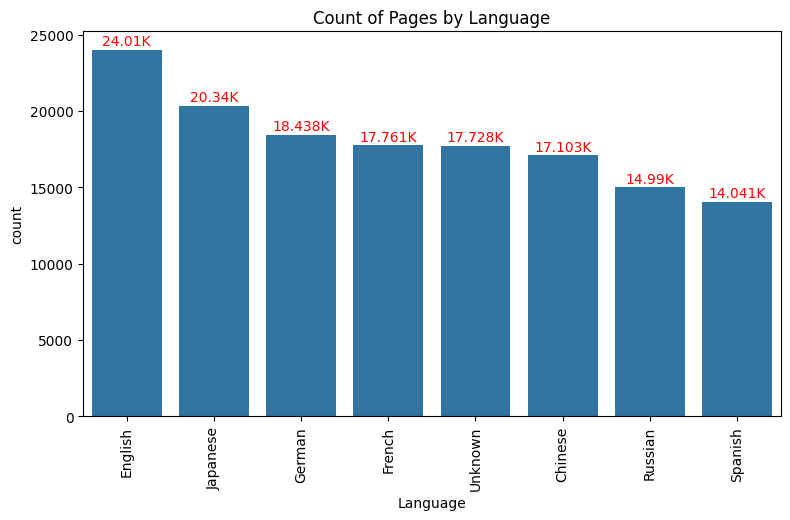

In [107]:
#count plot of Pages in Language
plt.figure(figsize=(9,5))
ax = sns.countplot(x="Language",data=data,order = data["Language"].value_counts().index)
for p in ax.patches:
  ax.annotate(
      text = f"{p.get_height()/1000}K",
      xy = ((p.get_x()+p.get_width()/2),p.get_height()+100),
      ha = 'center',
      va = 'bottom',
      fontsize = 10,
      color = 'red',
      rotation =0

  )
  plt.title("Count of Pages by Language")
plt.xticks(rotation=90);

**Insights:**

Approximately **17% of the pages are in English**, making it the most represented language. **Japanese follows closely with around 14% of the pages**. The **remaining languages**, including Chinese, Russian, German, French, and others, **each account for roughly 12%**, showing a relatively even distribution among them.

In [108]:
#Access Origin
data["AccessOrigin"].unique()

array(['spider', 'all-agents'], dtype=object)

In [109]:
data["AccessOrigin"].value_counts(normalize=True)*100

AccessOrigin
all-agents   75.92
spider       24.08
Name: proportion, dtype: float64

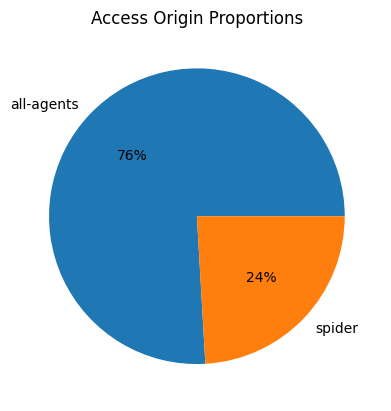

In [110]:
#pieplot for Access Origin proportions

labels = data['AccessOrigin'].value_counts().index
counts = data['AccessOrigin'].value_counts()

plt.title("Access Origin Proportions")
plt.pie(x = counts,labels=labels,autopct = "%1.0f%%")
plt.show()

**Insights:**

Approximately **24% of the pages are accessed by spiders**, while  **around 76% of the access comes from all-agents**.

In [111]:
#AccessType propotions
data["AccessType"].value_counts(normalize=True)*100

AccessType
all-access   51.24
mobile-web   24.80
desktop      23.96
Name: proportion, dtype: float64

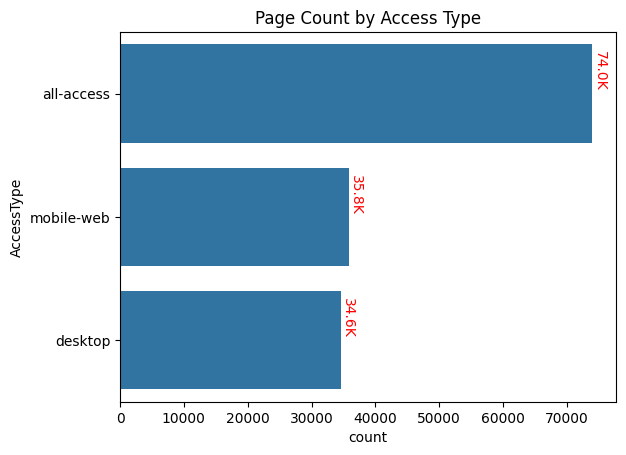

In [112]:
ax = sns.countplot(y=data["AccessType"],order = data["AccessType"].value_counts().index)

for p in ax.patches:
  ax.annotate(
      text = f"{p.get_width()/1000:.1f}K",
      xy = (p.get_width(),p.get_y()+0.1),
      ha='left',
      va='center_baseline',
      color = 'red',
      rotation=270

  )
plt.title("Page Count by Access Type")
plt.show()

**Insights:**

The **all-access** type accounts for **approximately 50%** of the page views, while both **desktop and mobile-web access types each contribute around 25%**

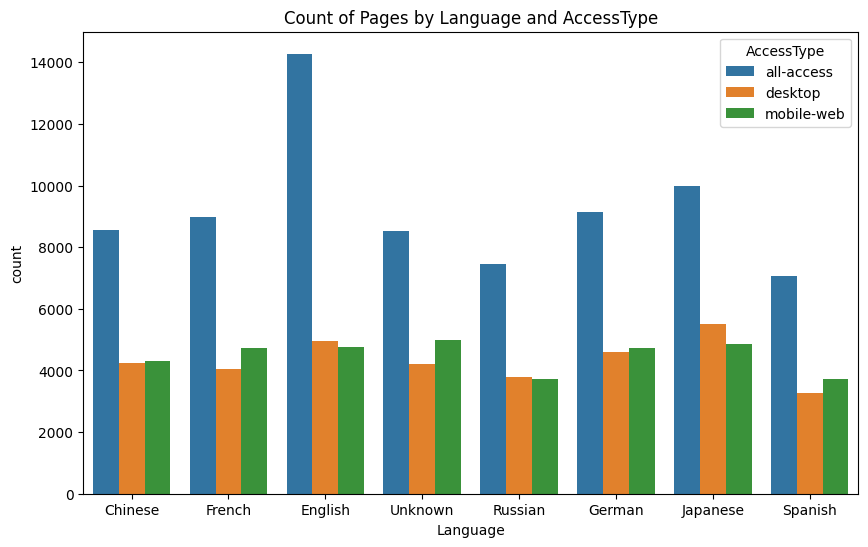

In [113]:
#@title Bivariate Analysis:

plt.figure(figsize=(10,6))
plt.title("Count of Pages by Language and AccessType")
sns.countplot(data=data,x="Language",hue="AccessType");

**Insights:**

English has more pages with AccessType of all-access

In [114]:
#@title Data Aggregation & preparation for Time Series Modeling

interpolated_data = data.copy()
interpolated_data.iloc[:,1:-5] = interpolated_data.iloc[:,1:-5].interpolate(axis=1,limit_direction="forward",method="linear") #axis = 1 across columns for each row


In [115]:
#Aggregate Pages by Language and compute mean

agg_data_mean = interpolated_data.groupby(by="Language")[interpolated_data.columns[1:-5]].mean().T

agg_data_mean.drop(columns=["Unknown"],inplace=True)

agg_data_mean.index = pd.to_datetime(agg_data_mean.index)

In [116]:
#Aggregatet the Pages by Language and compute medians

agg_data_medians = interpolated_data.groupby(by=["Language"])[interpolated_data.columns[1:-5]].median().T

agg_data_medians.drop(columns=["Unknown"],inplace=True)
agg_data_medians.index = pd.to_datetime(agg_data_medians.index)

In [117]:
#Aggregate the Pages by Language and compute sums

agg_data_sum = interpolated_data.groupby(by="Language")[interpolated_data.columns[1:-5]].sum().T

agg_data_sum.drop(columns=["Unknown"],inplace=True)

agg_data_sum.index = pd.to_datetime(agg_data_sum.index)


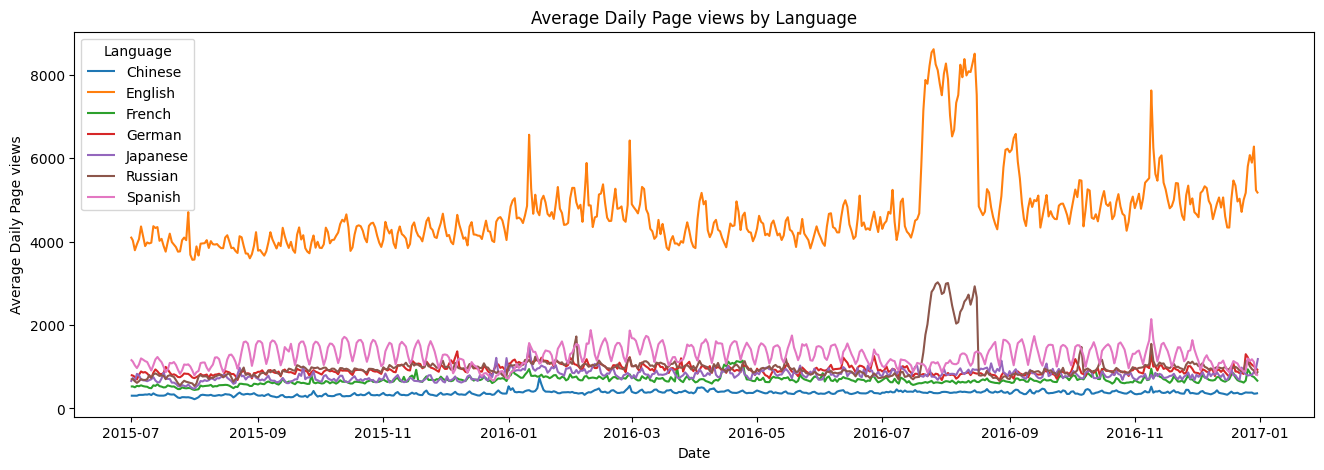

In [118]:
plt.figure(figsize=(16,5))
sns.lineplot(data=agg_data_mean, dashes=[(9, 0)] * len(agg_data_mean.columns))

plt.title("Average Daily Page views by Language")
plt.xlabel("Date")
plt.ylabel("Average Daily Page views")
plt.show()


**Insights:**

A notable spike in average daily views occurred in **August 2016** for both **English** and **Russian** pages.

Another significant increase was observed in **November 2016**, affecting pages in **English**, **German**, **Spanish**, and **Russian**.

**English** pages exhibit both a clear **trend** and **seasonality**, while pages in other languages primarily show **seasonality** without a consistent upward or downward trend.

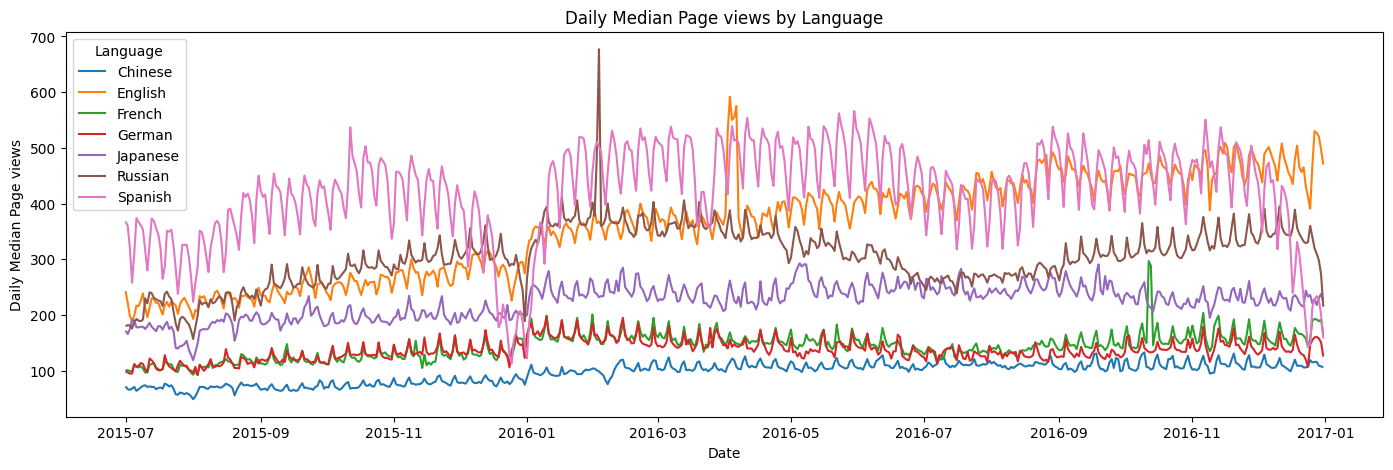

In [119]:
plt.figure(figsize=(17,5))
sns.lineplot(data=agg_data_medians, dashes=[(9, 0)] * len(agg_data_medians.columns))

plt.title("Daily Median Page views by Language")
plt.xlabel("Date")
plt.ylabel("Daily Median Page views")
plt.show()


**Insights:**

In terms of daily **median** page views, **Spanish** language pages consistently have higher values compared to other languages.

A noticeable **drop** in daily median views occurred for **Spanish**, **English**, and **Russian** pages.


Toward the end of 2016, **English** page median views began to match the levels of **Spanish** pages, showing a similar performance in daily traffic.

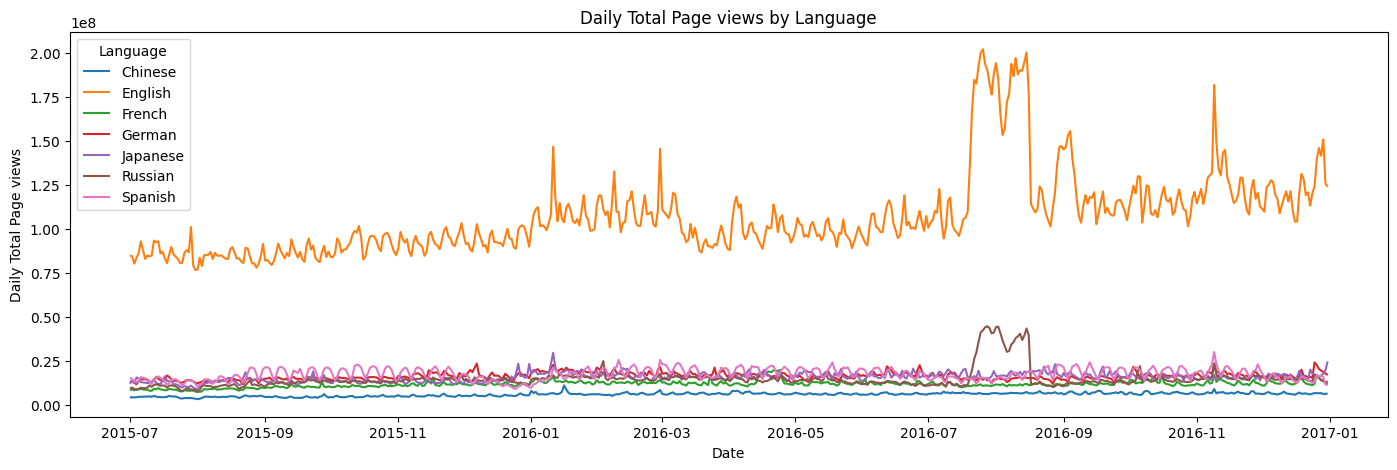

In [120]:
plt.figure(figsize=(17,5))
sns.lineplot(data=agg_data_sum, dashes=[(9, 0)] * len(agg_data_sum.columns))

plt.title("Daily Total Page views by Language")
plt.xlabel("Date")
plt.ylabel("Daily Total Page views")
plt.show()


**Insights:**

The daily total page views for **English** pages are **significantly higher than** other languages, which can be explained by the **larger number of English pages compared to other languages**.

**Spanish** pages exhibit clear seasonality in their daily total page views, with periodic fluctuations in traffic patterns.

In [121]:
#@title Checking Data is Stationary or non stationary

#Null Hypothesis : Data is not stationary
#Alternative Hypothesis : Data is Stationary

import statsmodels.api as sm

# Conducting ADF test on a time series 'data'(Dickey-Fuller test)
def adFullerTest(data,alpha=0.05):

  """
    Given the input data series, outputs the results of adfuller test
  """
  testStatistics,p_value,*rest = sm.tsa.stattools.adfuller(data)

  if p_value < alpha:
    print("Reject Null Hypothesis Accept Alternative Hypthesiss")
    print(f"Signal is stationary with p_value :- {np.round(p_value,4)}")
  else:
    print("Fail to reject Null Hypothesis")
    print(f"Signal is non stationary with p_value:- {np.round(p_value,4)}")



In [122]:
for language in agg_data_mean.columns:
  print(language)
  adFullerTest(agg_data_mean[language])
  print()


Chinese
Fail to reject Null Hypothesis
Signal is non stationary with p_value:- 0.2328

English
Fail to reject Null Hypothesis
Signal is non stationary with p_value:- 0.1071

French
Reject Null Hypothesis Accept Alternative Hypthesiss
Signal is stationary with p_value :- 0.0256

German
Fail to reject Null Hypothesis
Signal is non stationary with p_value:- 0.115

Japanese
Reject Null Hypothesis Accept Alternative Hypthesiss
Signal is stationary with p_value :- 0.046

Russian
Reject Null Hypothesis Accept Alternative Hypthesiss
Signal is stationary with p_value :- 0.0015

Spanish
Reject Null Hypothesis Accept Alternative Hypthesiss
Signal is stationary with p_value :- 0.0331



**Insights:**

**Spanish, Russian, Japanese and French** series are **stationary**.

**Chinese, English and German**series are **non stationary**.

In [123]:
#@title Further analysis on aggregated english data

english = agg_data_mean['English'].copy()


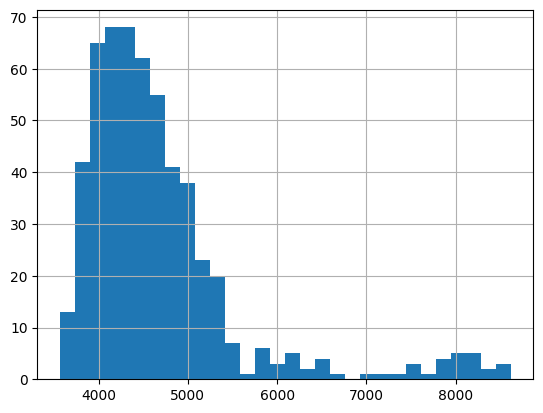

In [124]:
#plot the histogram of the english

english.hist(bins=30);

<Axes: >

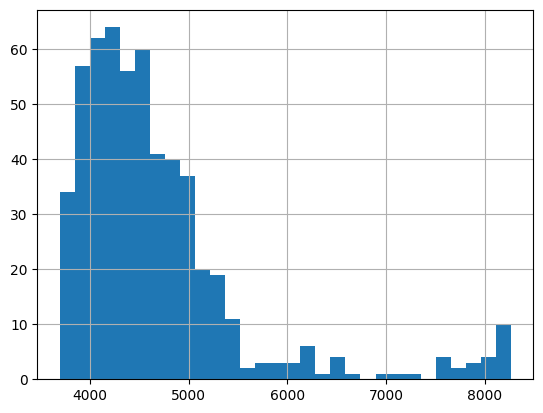

In [125]:
english_cliped= english.clip(lower = english.quantile(0.01), upper = english.quantile(0.99))
english_cliped.hist(bins=30)

**Insights:**

Clipped the series using quantile technique with lower & upper quantiles as 0.01,0.99.

Looking at the plots, clipping seems optional

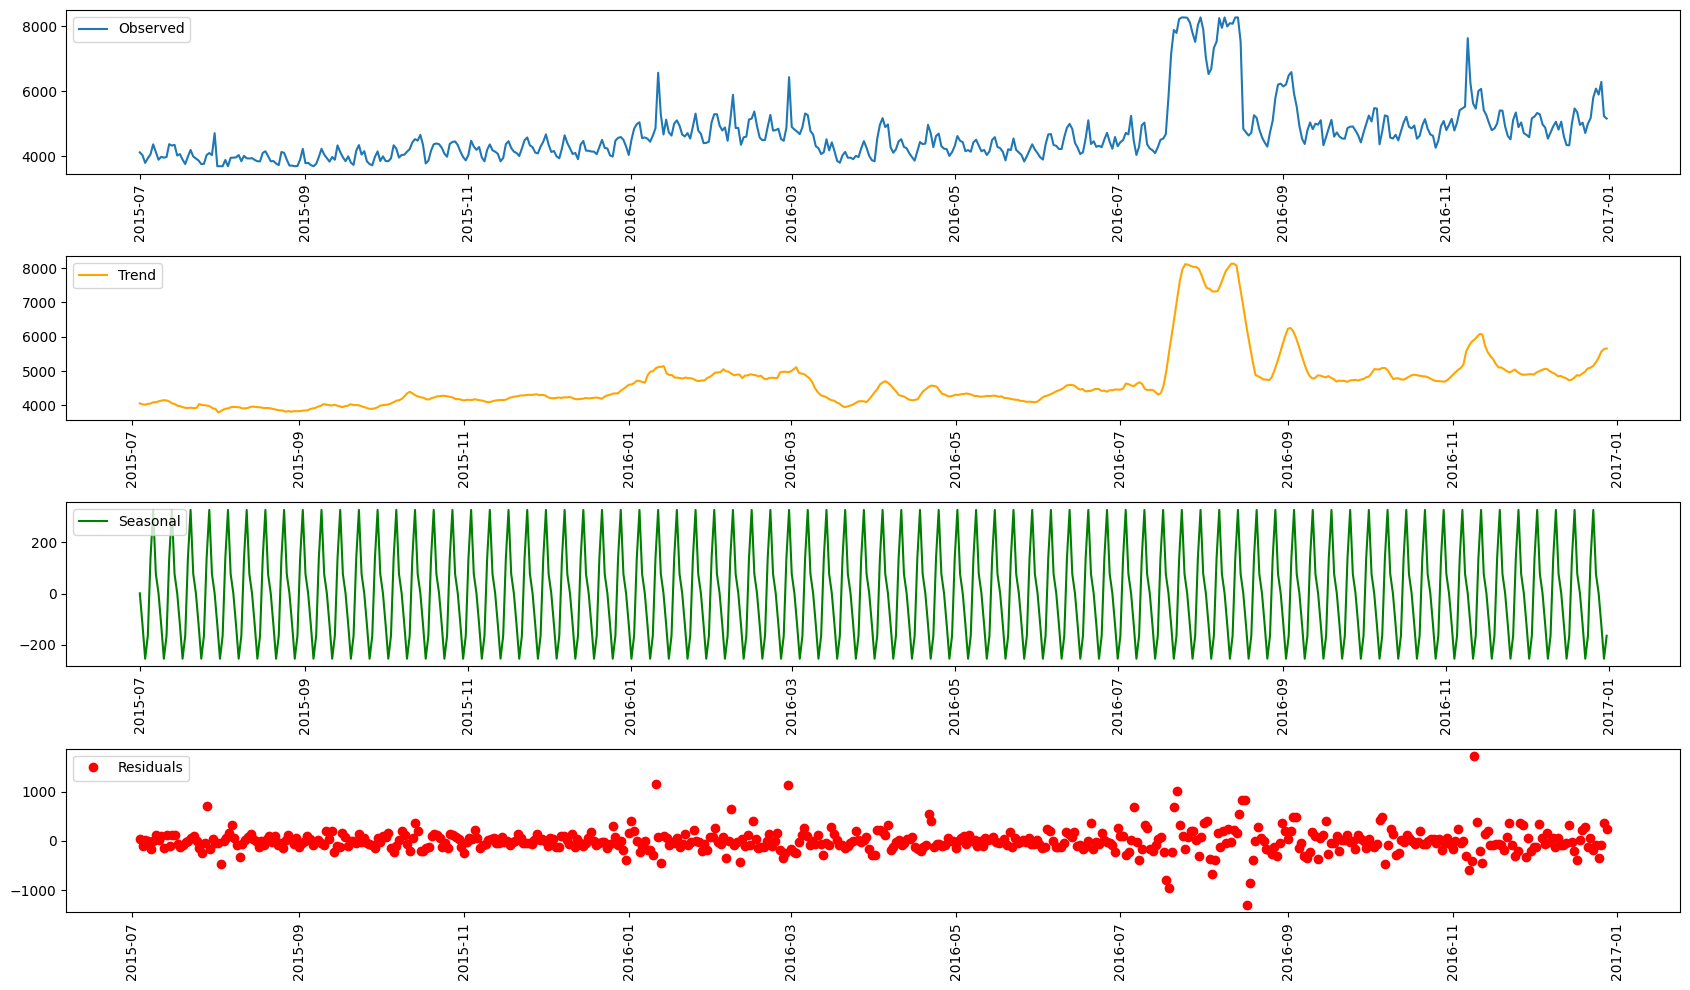

In [126]:
#@title Signal Decompose method
decomp_english = sm.tsa.seasonal_decompose(english_cliped)

# Manually plot each component
plt.figure(figsize=(17,10))  # Set a larger figure size
plt.subplot(411)
plt.plot(decomp_english.observed, label='Observed')
plt.legend(loc='upper left')
plt.xticks(rotation=90)

plt.subplot(412)
plt.plot(decomp_english.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.xticks(rotation=90)

plt.subplot(413)
plt.plot(decomp_english.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.xticks(rotation=90)

plt.subplot(414)
plt.plot(decomp_english.resid, label='Residuals', color='red', marker='o', linestyle='None')
plt.legend(loc='upper left')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


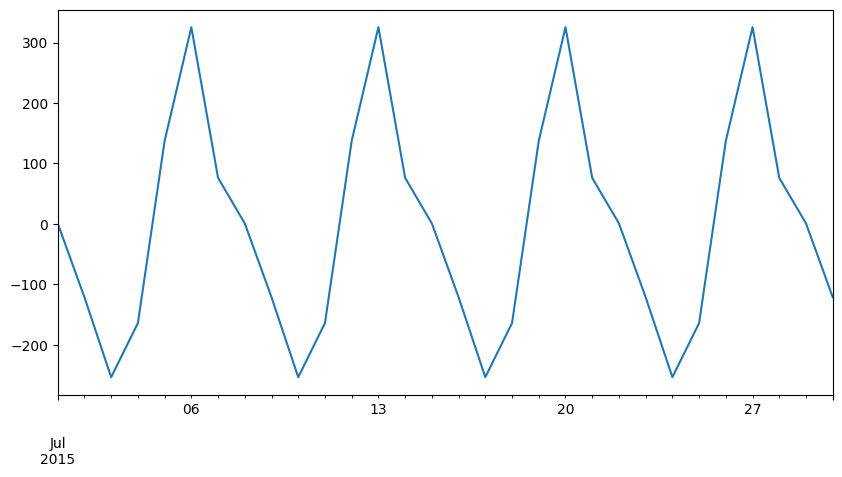

In [127]:
plt.figure(figsize=(10,5))
decomp_english.seasonal.head(30).plot();

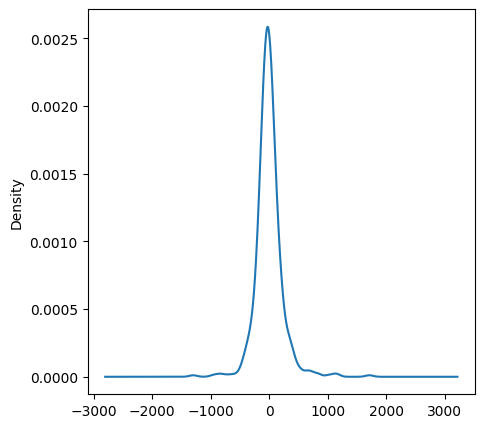

In [128]:
plt.figure(figsize=(5,5))
decomp_english.resid.plot(kind="kde");

**Insights**:

Non stationary signals can be written as summation or multiplication of trend, seasonality, and residuals. As per the plots above, there is clearly seasonality in the data - Pattern repeats every 7 days. There is no clear Trend - increases, decreases, constant.

Residual is normally distributed- No need to break down residual further.

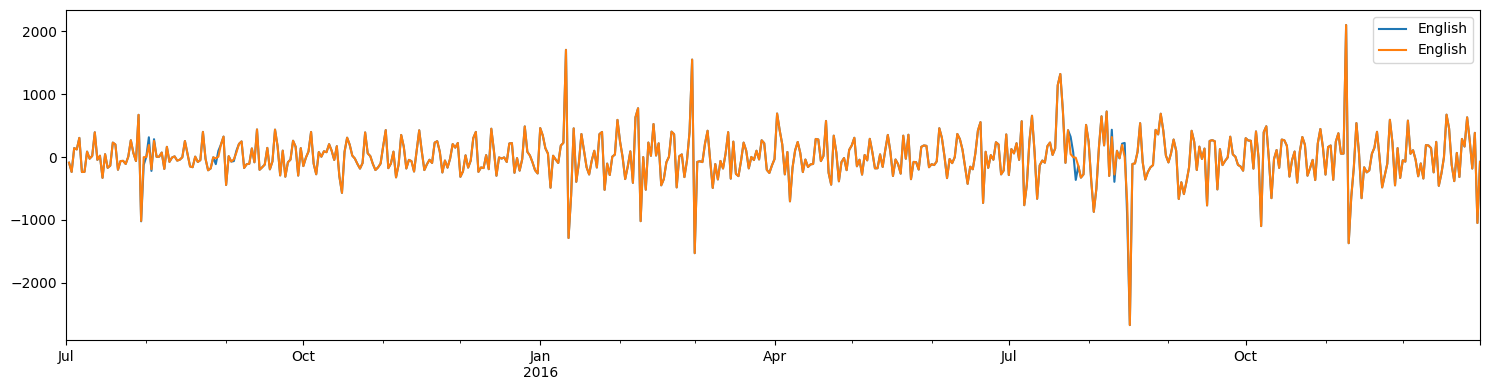

In [129]:
# Lets difference the data once to detrend
#@title Difference of Series
plt.figure(figsize=(15,4))
english.diff().plot()
english_cliped.diff().plot()
plt.tight_layout()
plt.legend();

In [130]:
# Check to see if the signal is stationary
adFullerTest(english_cliped.diff().dropna())

Reject Null Hypothesis Accept Alternative Hypthesiss
Signal is stationary with p_value :- 0.0


In [131]:
# Save the clipped data to different variable
Stationary_english_Clipped = english_cliped.diff().dropna()

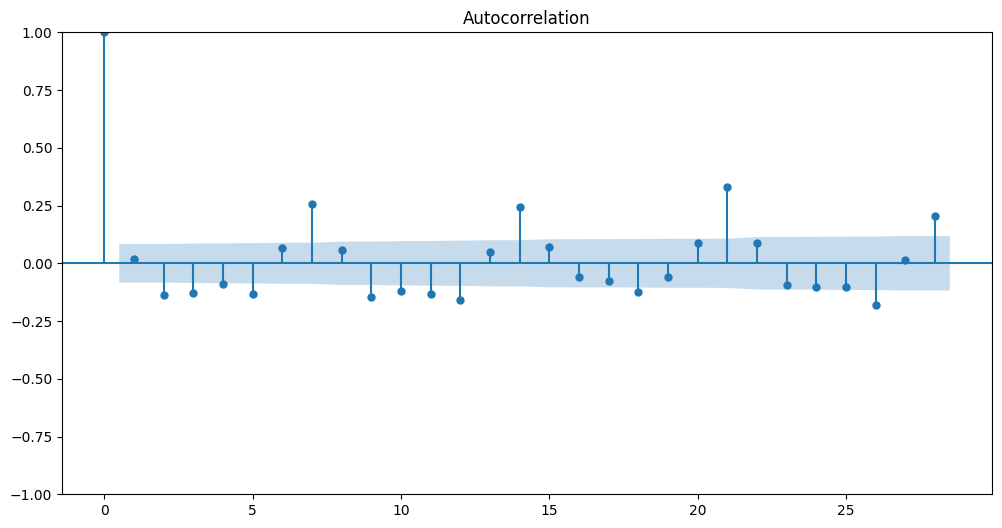

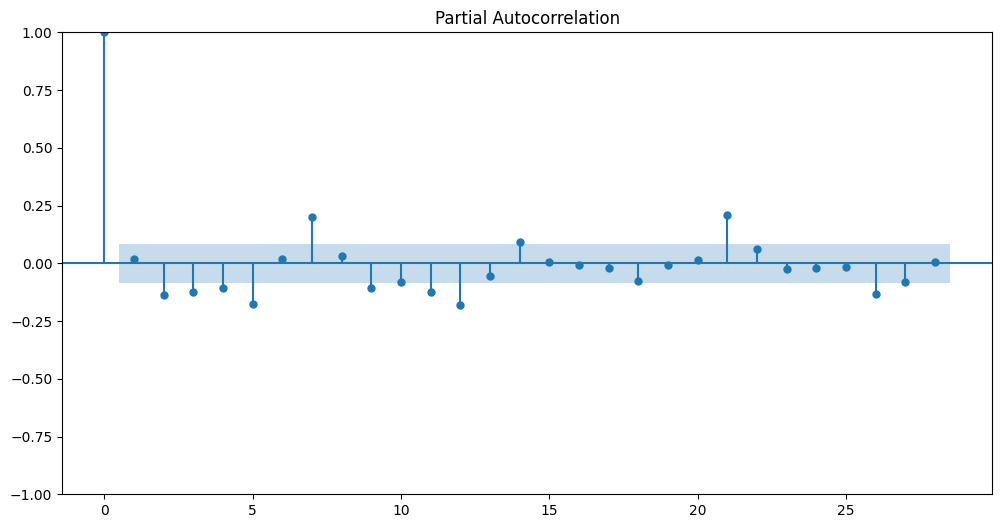

In [132]:
#@title ACP and PACP plots
# Lets plot auto correlation & partial auto correlation plots
# Plot the ACF
plt.figure(figsize=(12, 6))  # Set figure size for ACF plot
sm.tsa.graphics.plot_acf(Stationary_english_Clipped, ax=plt.gca())  # Use plt.gca() to get the current axis
plt.show()

# Plot the PACF
plt.figure(figsize=(12, 6))  # Set figure size for PACF plot
sm.tsa.graphics.plot_pacf(Stationary_english_Clipped, ax=plt.gca())  # Use plt.gca() to get the current axis
plt.show()

**Insights:**

In neither acf or pacf plot,s there is an exponential decaying trend. So, simple auto regression, or moving average wouldn't give better results.

ARIMA, SARIMA, SARIMAX models would definitely do better than base models.

You can observe, seasonality of 7 days in the above plots

In [133]:
from sklearn.metrics import (mean_squared_error as mse, mean_absolute_error as mae, mean_absolute_percentage_error as mape)


#create a function to calculate all metrics

def performance(actual,predicted):
  print("RMSE : ",np.round(mse(actual,predicted)**0.5,3))
  print("MAE : ",np.round(mae(actual,predicted),3))
  print("MAPE : ",np.round(mape(actual,predicted),3))


In [134]:
import warnings
warnings.filterwarnings(action="ignore")

# Experiement with differnt Modeling Techinques

## Exponential Smoothing

In [135]:
X_train = english_cliped[english_cliped.index <= english_cliped.index[-35]]
X_test = english_cliped[english_cliped.index > english_cliped.index[-35]]

In [136]:

ExpModel = sm.tsa.ExponentialSmoothing(X_train,seasonal="add",trend="add")
ExpModel = ExpModel.fit()

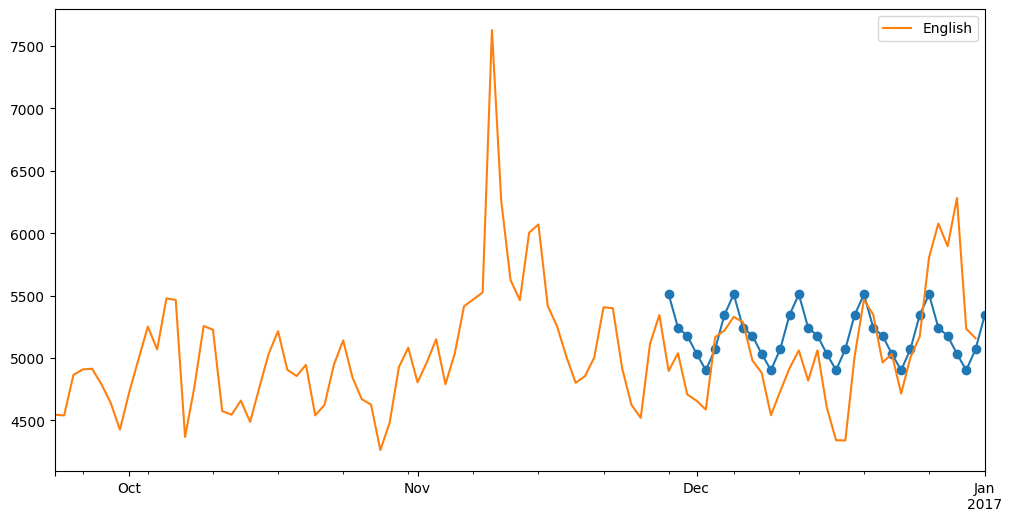

In [137]:
plt.figure(figsize=(12, 6))
PredEnglish = ExpModel.forecast(35)
PredEnglish.plot(style='-o')
english_cliped.tail(100).plot()
plt.legend()

In [138]:

performance(english_cliped[-35:],PredEnglish)

RMSE :  479.683
MAE :  370.341
MAPE :  0.073


**Insights:**

**Exponential** model is able to predict the data with an **MAPE of ~7%**.

Lets check futher to see if other models do any better

# ARIMA

In [139]:
def ARIMA(df,idx,order=(0,0,0),seasonal_order=(0,0,0,0)):

  X_train,X_test = df.iloc[:-idx],df.iloc[-idx:]

  model = sm.tsa.ARIMA(endog=X_train,order = order,seasonal_order=seasonal_order)
  result = model.fit()

  predTest = result.forecast(len(X_test))
  plt.figure(figsize=(16,5))
  predTest.plot(style="-*",label="Prediction")
  df.tail(100).plot(label="Original")
  plt.ylabel("Views")
  plt.xlabel("Date")
  plt.legend();

  performance(X_test,predTest)
  print()

RMSE :  443.572
MAE :  342.994
MAPE :  0.068



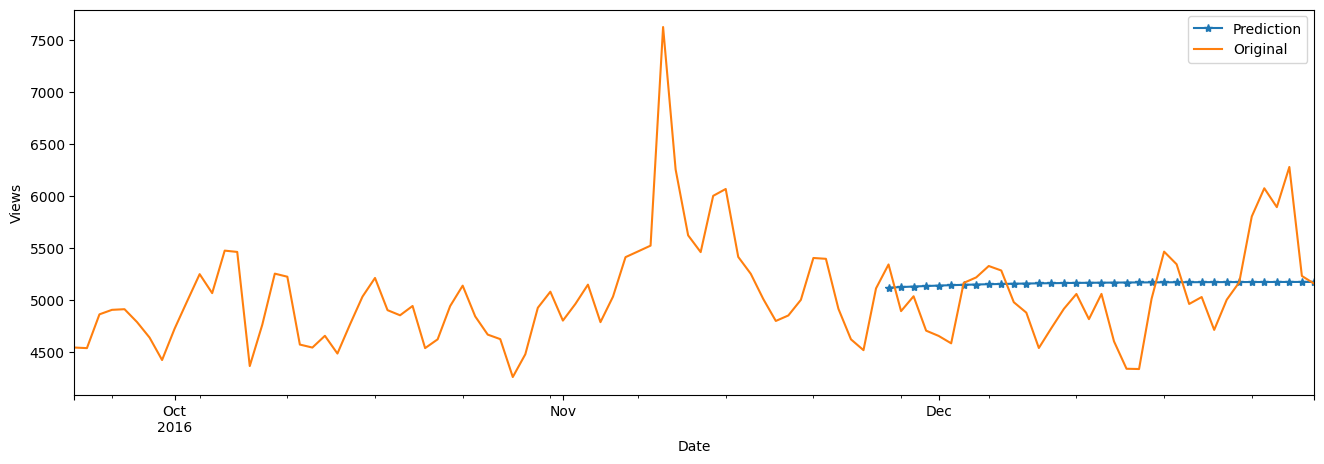

In [140]:
ARIMA(english_cliped,idx = 35,order=(1,1,1))

**Insights:**

ARIMA with p,d,q as 1,1,1 is ableto predict the recent 35 days of data with ~6.8% MAPE

# SARIMAX
Below function can be used with and without exogeneous variable

Based on the order, seasonal_order, it can work as AR, MA, ARIMA, SARIMA, SARIMAX

Seasonal AutoRegressive Integrated Moving Average with Exogenous Regressors that use Moving average of errors, Auto regression on historical signal values, considers seasonality and external data to predict the future values

In [141]:
def SARIMAX(df,idx,order=(0,0,0),seasonal_order=(0,0,0,0),exog= None, batch=False):

  X_train, X_test = df.iloc[:-idx],df.iloc[-idx:]
  if exog.shape[0]:
        exog_train = exog[:-idx]
        exog_test = exog[-idx:]

  model = sm.tsa.SARIMAX(endog=X_train,
                           exog=exog_train,
                           order=order,
                           seasonal_order=seasonal_order,
                          )
  result = model.fit(disp=False)
  predTest  = result.forecast(len(X_test),dynamic=False,exog=exog_test)
  if not batch:
        plt.figure(figsize=(16,5))
        predTest.plot(style="-*",label="Prediction")
        df.tail(100).plot(label="Original")
        plt.ylabel("Views")
        plt.xlabel("Date")
        plt.legend();

        performance(X_test,predTest)

  return result.aic


RMSE :  399.915
MAE :  341.408
MAPE :  0.07


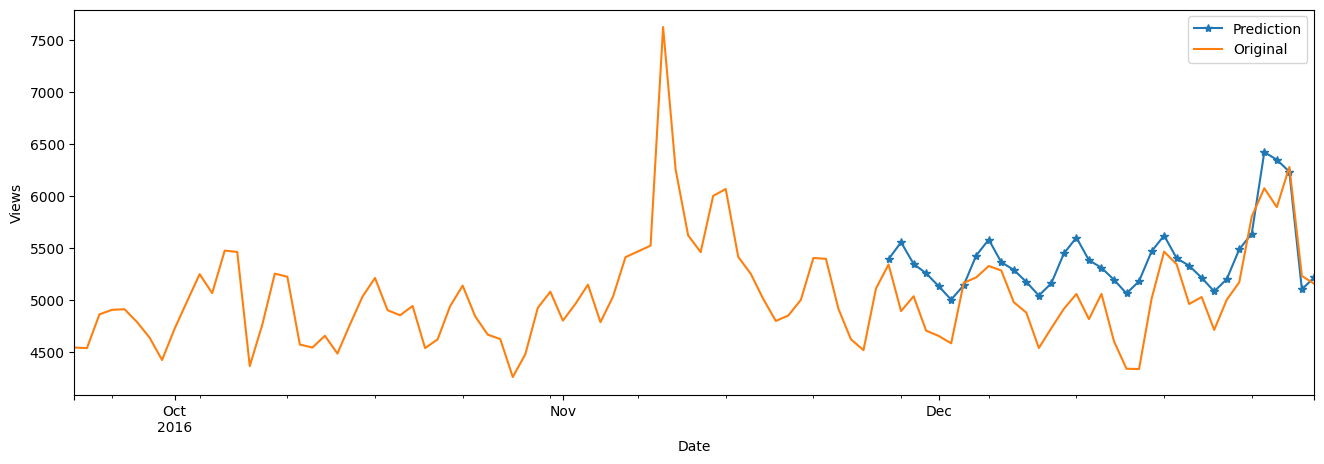

In [142]:
# Running with p,d,q  as 1,1,1; P,D,Q,m = 1,1,1,7
# To predict last 35 values
exog.index = english_cliped.index
SARIMAX(df=english_cliped,idx=35,order=(1,1,1),seasonal_order=(1,1,1,7),exog=exog,batch=False);

**Insights:**

With p,d,q and P,D,Q,m as 1,1,1 and 1,1,1,7, we got a model that predicts with an MAPE of 7%

We can do a grid search on above parameters to find the optimal p,d,q,P,D,Q values

In [143]:
from itertools import product
from pprint import pprint
import heapq

In [144]:
def SARIMAX_mape(df,idx,order=(0,0,0),seasonal_order=(0,0,0,0),exog= None, batch=False):

    import statsmodels.api as sm

    X_train, X_test = df.iloc[:-idx],df.iloc[-idx:]

    if exog is not None:
        exog_train = exog[:-idx]
        exog_test = exog[-idx:]
    else:
        exog_train,exog_test =  None,None

    model = sm.tsa.SARIMAX(endog=X_train,
                           exog=exog_train,
                           order=order,
                           seasonal_order=seasonal_order,
                          )
    result = model.fit(disp=False)
    predTest  = result.forecast(len(X_test),dynamic=False,exog=exog_test)

    if not batch:
        plt.figure(figsize=(16,5))
        predTest.plot(style="-*",label="Prediction")
        df.tail(100).plot(label="Original")
        plt.ylabel("Views")
        plt.xlabel("Date")
        plt.legend();

        performance(X_test,predTest)

    mape_val = round(mape(X_test, predTest), 3)

    return mape_val


In [145]:
# This grid search is for English series with exogenous variable
# Based on how it works, we can replicate it to other languages

p = d = q = range(1,3)

#Using product to create all permuatations of p,d,q,P,D,Q
pdq = list(product(p,d,q))
PDQ = [(x[0],x[1],x[2],7) for x in pdq]

all_results_mape = []

for order in pdq:
    for seasonal in PDQ:

        try:
            # MAPE is stored in the result
            result = SARIMAX_mape(df=english_cliped,
                             idx=35,order= order,seasonal_order=seasonal,exog=exog,batch=True);


            all_results_mape.append((order,seasonal,-result))
            print(order,seasonal,result)

        except:
            print(f"Skipped {order},{seasonal}")
            continue

# We store the MAPE values as negative to use nlargest function to find the best parameters
top5_results_mape = heapq.nlargest(5, all_results_mape,lambda k:k[2])
print(top5_results_mape)

(1, 1, 1) (1, 1, 1, 7) 0.07
(1, 1, 1) (1, 1, 2, 7) 0.068
(1, 1, 1) (1, 2, 1, 7) 0.045
(1, 1, 1) (1, 2, 2, 7) 0.165
(1, 1, 1) (2, 1, 1, 7) 0.077
(1, 1, 1) (2, 1, 2, 7) 0.987
(1, 1, 1) (2, 2, 1, 7) 0.069
(1, 1, 1) (2, 2, 2, 7) 3508.293
(1, 1, 2) (1, 1, 1, 7) 0.061
(1, 1, 2) (1, 1, 2, 7) 0.061
(1, 1, 2) (1, 2, 1, 7) 0.053
(1, 1, 2) (1, 2, 2, 7) 0.084
(1, 1, 2) (2, 1, 1, 7) 0.069
(1, 1, 2) (2, 1, 2, 7) 0.068
(1, 1, 2) (2, 2, 1, 7) 0.065
(1, 1, 2) (2, 2, 2, 7) 0.986
(1, 2, 1) (1, 1, 1, 7) 0.063
(1, 2, 1) (1, 1, 2, 7) 0.07
(1, 2, 1) (1, 2, 1, 7) 0.047
(1, 2, 1) (1, 2, 2, 7) 0.061
(1, 2, 1) (2, 1, 1, 7) 0.07
(1, 2, 1) (2, 1, 2, 7) 0.071
(1, 2, 1) (2, 2, 1, 7) 0.063
Skipped (1, 2, 1),(2, 2, 2, 7)
(1, 2, 2) (1, 1, 1, 7) 0.07
(1, 2, 2) (1, 1, 2, 7) 0.07
(1, 2, 2) (1, 2, 1, 7) 0.044
(1, 2, 2) (1, 2, 2, 7) 0.067
(1, 2, 2) (2, 1, 1, 7) 0.059
(1, 2, 2) (2, 1, 2, 7) 0.072
(1, 2, 2) (2, 2, 1, 7) 0.072
(1, 2, 2) (2, 2, 2, 7) 0.986
(2, 1, 1) (1, 1, 1, 7) 0.064
(2, 1, 1) (1, 1, 2, 7) 0.063
(2, 1, 1) (1, 

RMSE :  291.266
MAE :  224.313
MAPE :  0.044


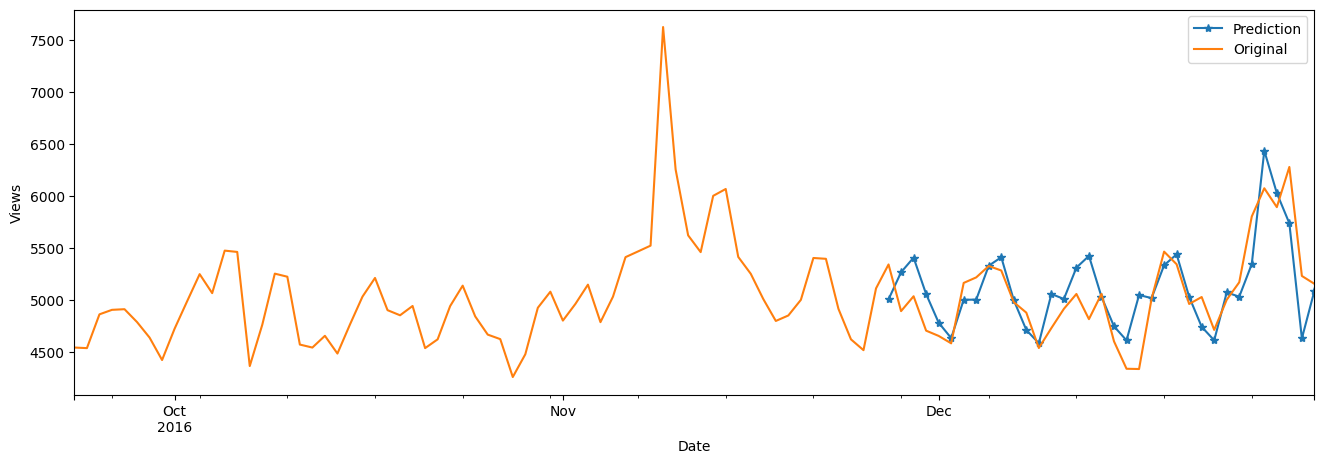

In [146]:
# From the above grid search results- selected the best parameters
SARIMAX_mape(df=english_cliped,idx=35,order=(1,2,2),seasonal_order=(1,2,1,7),exog=exog,batch=False);

**Insights:**

Using grid search, we could find optimal parameters that predicts with an MAPE of 4.4%. Better than our prior models

In [147]:
# Pipeline function for different languages

# 1. Dataset is available in agg_data_means[language]
# 2. Function to call Grid Search on SARIMA - EXOG is not passed
# 3. Store top 5 results for each language in Dictionary

def grid_search_sarimax(df, p, d, q, m, exog=None, idx=35):

    p,d,q = p,d,q
    pdq = list(product(p,d,q))
    PDQ = [(x[0],x[1],x[2],m) for x in pdq]

    all_results_mape = []

    for order in pdq:
        for seasonal in PDQ:

            try:
                result = SARIMAX_mape(df=df,
                                 idx=idx,order= order,seasonal_order=seasonal,exog=exog,batch=True);


                all_results_mape.append((order,seasonal,-result))
                print(f"order:{order},seasonal:{seasonal},MAPE:{result}")

            except:
                print(f"Skipped params: {order},{seasonal}")
                continue


    top5_results_mape = heapq.nlargest(5, all_results_mape,lambda k:k[2])
    return top5_results_mape

top5results_by_lang = {}

# for different languages
for language in agg_data_mean.columns:

    # Dataset is available in agg_data_means[language]
    df_lang = f"df_{language}"
    df_lang = agg_data_mean[language]


    # Call Grid Search
    print(f"Language:{language}")
    output = grid_search_sarimax(df_lang, p=range(1,3), d=range(1,3), q=range(1,3), m=7, exog=None, idx=35)
    top5results_by_lang[language] = output

pprint(top5results_by_lang)


Language:Chinese
order:(1, 1, 1),seasonal:(1, 1, 1, 7),MAPE:0.086
order:(1, 1, 1),seasonal:(1, 1, 2, 7),MAPE:0.086
order:(1, 1, 1),seasonal:(1, 2, 1, 7),MAPE:0.073
order:(1, 1, 1),seasonal:(1, 2, 2, 7),MAPE:0.063
order:(1, 1, 1),seasonal:(2, 1, 1, 7),MAPE:0.086
order:(1, 1, 1),seasonal:(2, 1, 2, 7),MAPE:0.086
Skipped params: (1, 1, 1),(2, 2, 1, 7)
order:(1, 1, 1),seasonal:(2, 2, 2, 7),MAPE:0.05
order:(1, 1, 2),seasonal:(1, 1, 1, 7),MAPE:0.086
order:(1, 1, 2),seasonal:(1, 1, 2, 7),MAPE:0.087
order:(1, 1, 2),seasonal:(1, 2, 1, 7),MAPE:0.073
order:(1, 1, 2),seasonal:(1, 2, 2, 7),MAPE:1.0
order:(1, 1, 2),seasonal:(2, 1, 1, 7),MAPE:0.086
order:(1, 1, 2),seasonal:(2, 1, 2, 7),MAPE:0.086
order:(1, 1, 2),seasonal:(2, 2, 1, 7),MAPE:0.09
order:(1, 1, 2),seasonal:(2, 2, 2, 7),MAPE:0.05
order:(1, 2, 1),seasonal:(1, 1, 1, 7),MAPE:0.152
order:(1, 2, 1),seasonal:(1, 1, 2, 7),MAPE:0.153
order:(1, 2, 1),seasonal:(1, 2, 1, 7),MAPE:0.266
order:(1, 2, 1),seasonal:(1, 2, 2, 7),MAPE:0.397
order:(1, 2, 1),se

# Chinese

RMSE :  16.895
MAE :  13.661
MAPE :  0.037


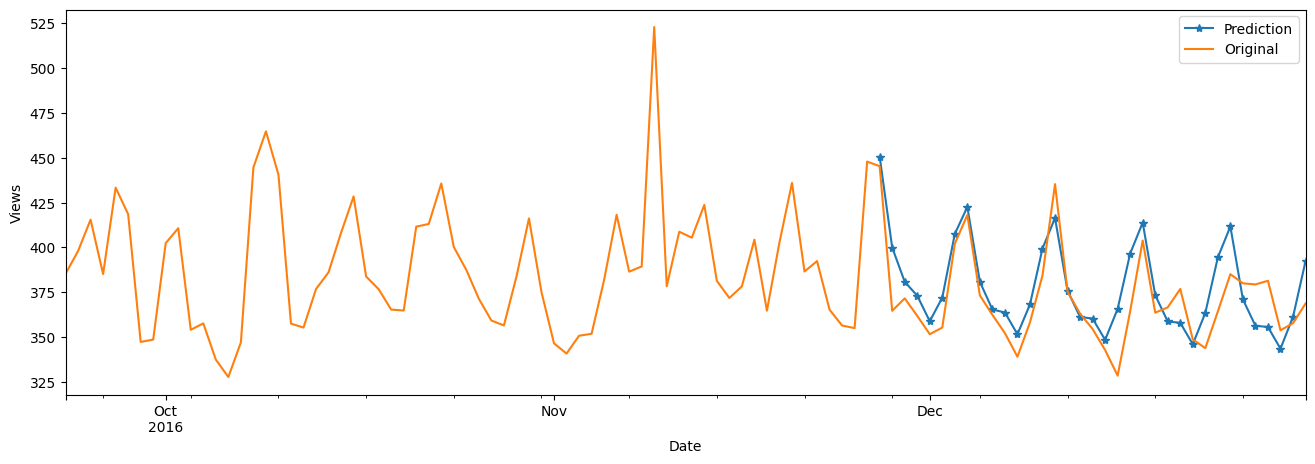

In [148]:
order, seasonal = (2,1,1),(1,2,2,7)
SARIMAX_mape(df=agg_data_mean["Chinese"],idx=35,order= order,seasonal_order=seasonal,exog=None,batch=False);

# English

RMSE :  452.232
MAE :  305.305
MAPE :  0.058


0.058

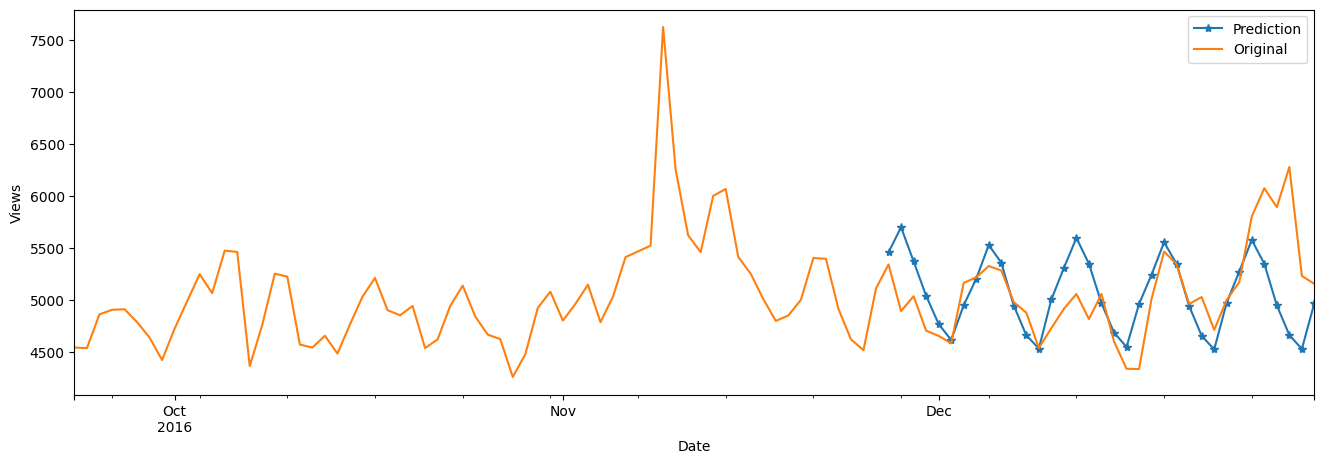

In [150]:
order,seasonal = (1, 2, 2), (1, 2, 1, 7)
SARIMAX_mape(df=agg_data_mean["English"],idx=35,order=order,seasonal_order=seasonal,exog=None,batch=False)

# French

RMSE :  64.604
MAE :  46.837
MAPE :  0.063


0.063

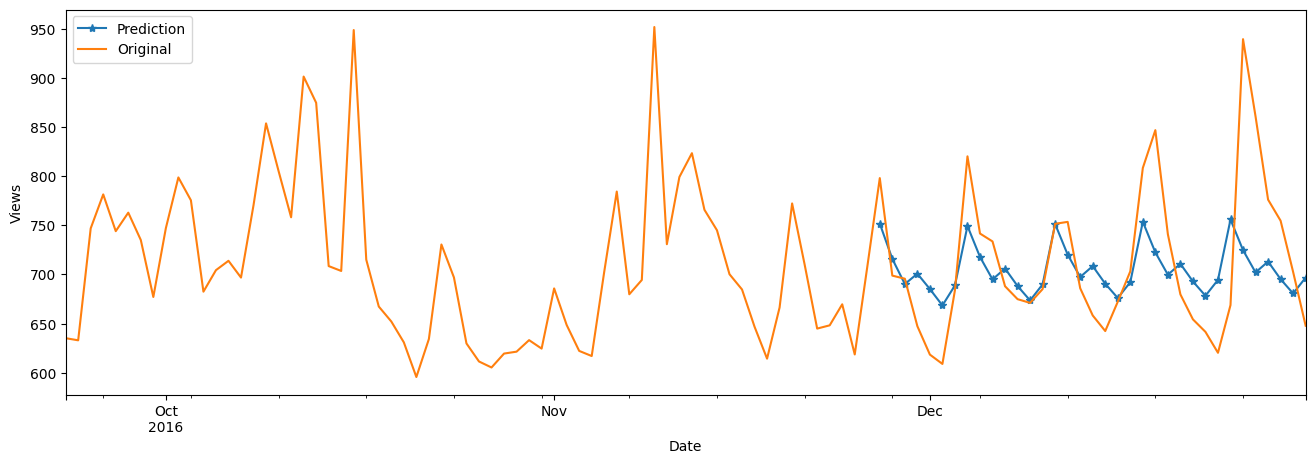

In [152]:
order,seasonal = (1, 1, 1), (1, 1, 1, 7)
SARIMAX_mape(df=agg_data_mean["French"],idx=35,order=order,seasonal_order=seasonal,exog=None,batch=False)

# German

RMSE :  116.066
MAE :  70.123
MAPE :  0.067


0.067

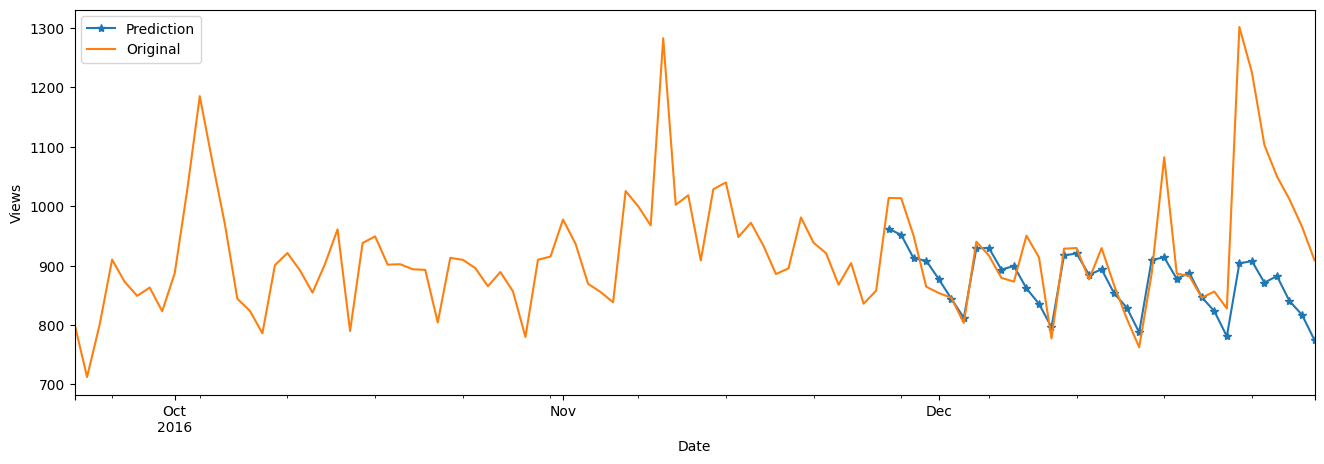

In [153]:
order,seasonal = (1, 1, 1), (2, 2, 2, 7)
SARIMAX_mape(df=agg_data_mean['German'],idx=35,order=order,seasonal_order=seasonal,exog=None,batch=False)


# Japanese

RMSE :  93.548
MAE :  62.319
MAPE :  0.072


0.072

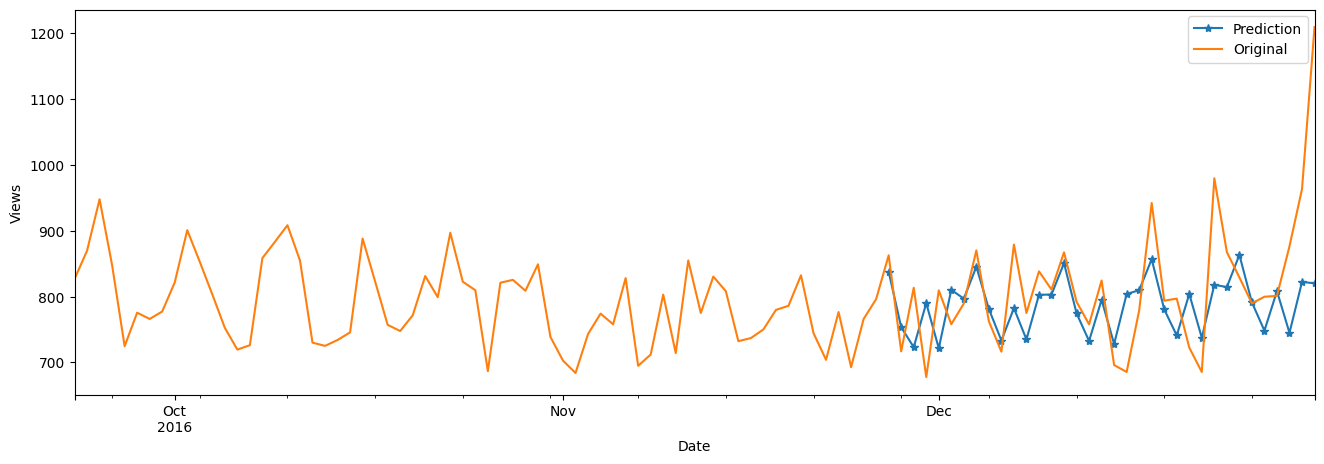

In [162]:
order, seasonal = (1, 2, 1), (2, 2, 1, 7)
SARIMAX_mape(df=agg_data_mean["Japanese"],idx=35,order=order,seasonal_order = seasonal,exog =None,batch=False)

# Russian


RMSE :  67.16
MAE :  54.349
MAPE :  0.056


0.056

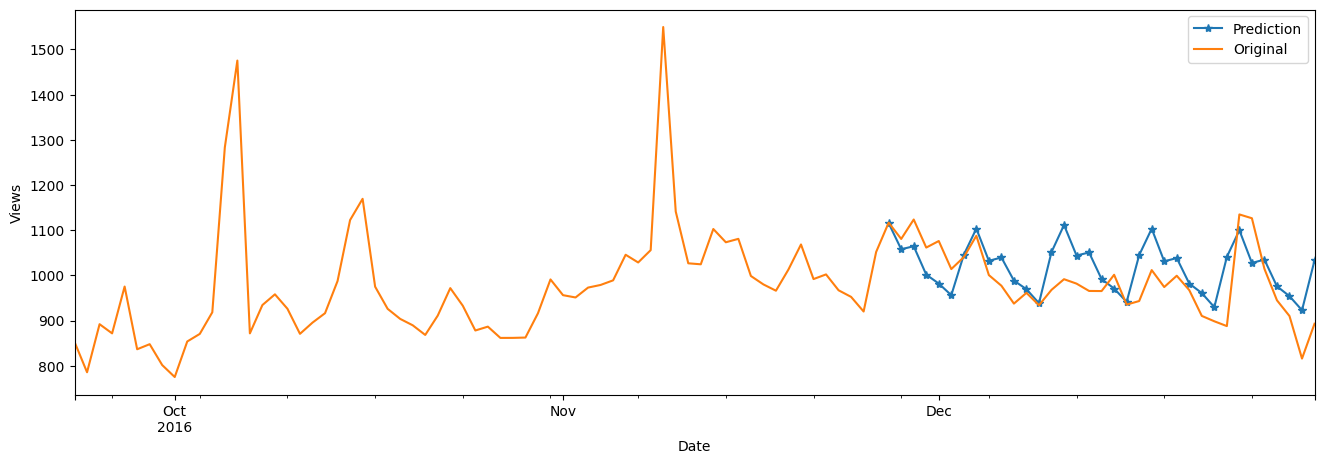

In [166]:
order,seasonal = (1, 1, 1), (1, 2, 1, 7)

SARIMAX_mape(df=agg_data_mean["Russian"],idx=35,order=order,seasonal_order=seasonal,exog=None,batch=False)

# Spanish

RMSE :  112.812
MAE :  92.815
MAPE :  0.088


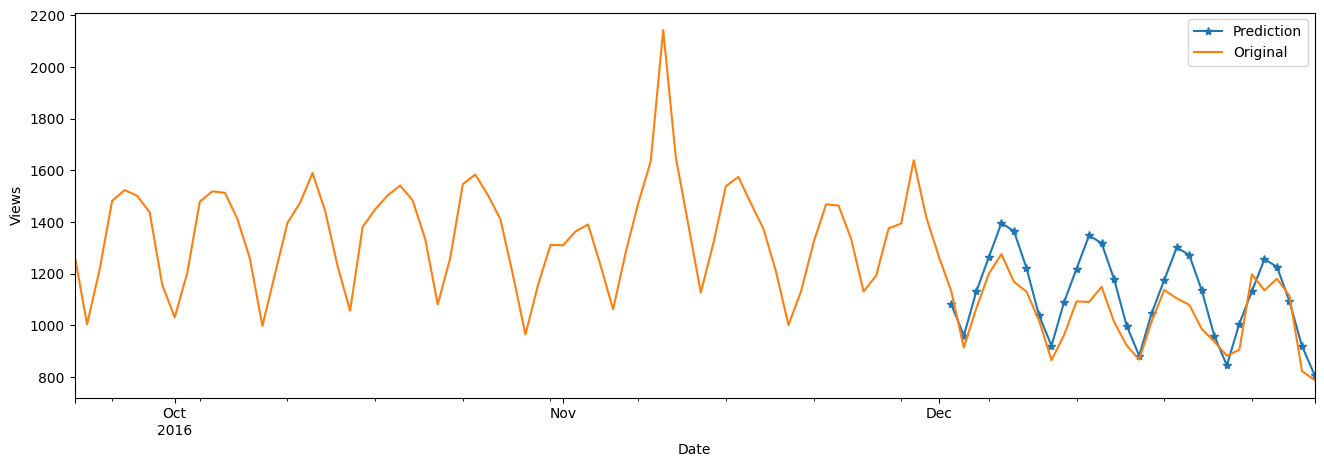

In [161]:
order, seasonal = (1,1,0),(1,0,1,7)
SARIMAX_mape(df=agg_data_mean["Spanish"],idx=30,order= order,seasonal_order=seasonal,exog=None,batch=False);

**Insights:**

The **average page views** for each language were **forecasted** using the optimal parameters obtained from a Grid Search on the **SARIMAX model**, excluding exogenous variables.

**English Pages**: The Mean Absolute Percentage Error (**MAPE**) increased by **approximately 2%** when campaign data was excluded during training, indicating a slight reduction in prediction accuracy.

**Spanish Pages**: The model performed better when predicting the last 30 days compared to the last 35 days, showing that predictions closer to the training window tend to be more accurate.

# Prophet


In [167]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot


In [168]:
# prepare the data for using prophet
prophet_input = english_cliped.reset_index().rename(columns={"index":"ds","English":"y"})
train_data,test_data = prophet_input.iloc[:-35],prophet_input.iloc[-35:]

In [169]:
# Trying to predict with 95% confidence intervals
fbmodel = Prophet(weekly_seasonality=True,interval_width=0.95)
fbmodel.fit(train_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxt3p_4x6/03z18z6r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxt3p_4x6/onpe1l93.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77984', 'data', 'file=/tmp/tmpxt3p_4x6/03z18z6r.json', 'init=/tmp/tmpxt3p_4x6/onpe1l93.json', 'output', 'file=/tmp/tmpxt3p_4x6/prophet_modelejsnc1zq/prophet_model-20250210190256.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:02:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:02:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [170]:
# This is to create timeseries dataframe automatically
forecast_period = fbmodel.make_future_dataframe(periods=35,freq="D",include_history=True)

In [171]:
# Store the forecast
prophet_forecast = fbmodel.predict(forecast_period)

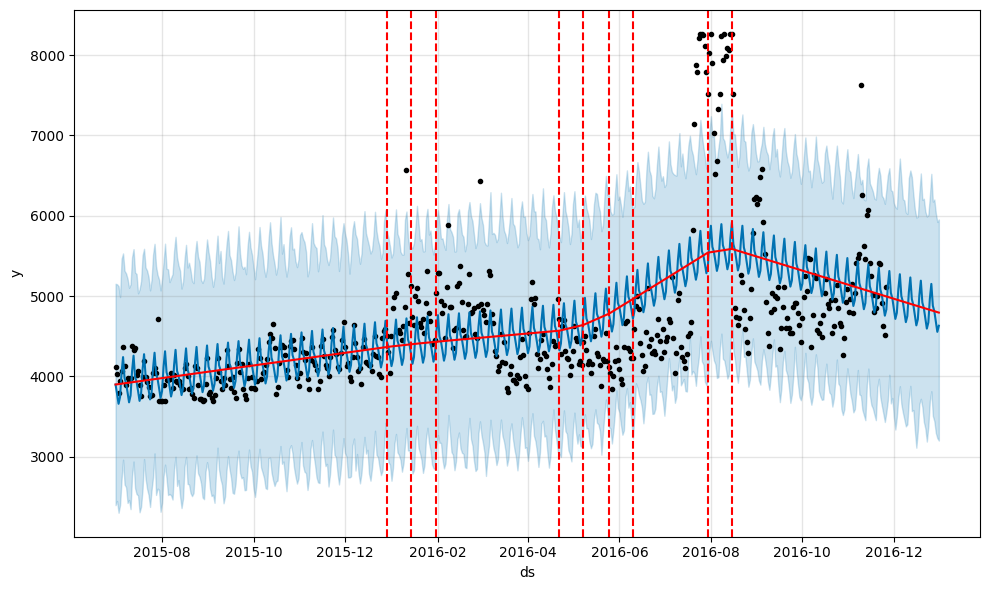

In [172]:
# Plot the changepoints, forecast along with confidence interval
fig = fbmodel.plot(prophet_forecast,uncertainty=True)
a = add_changepoints_to_plot(fig.gca(),fbmodel,prophet_forecast)

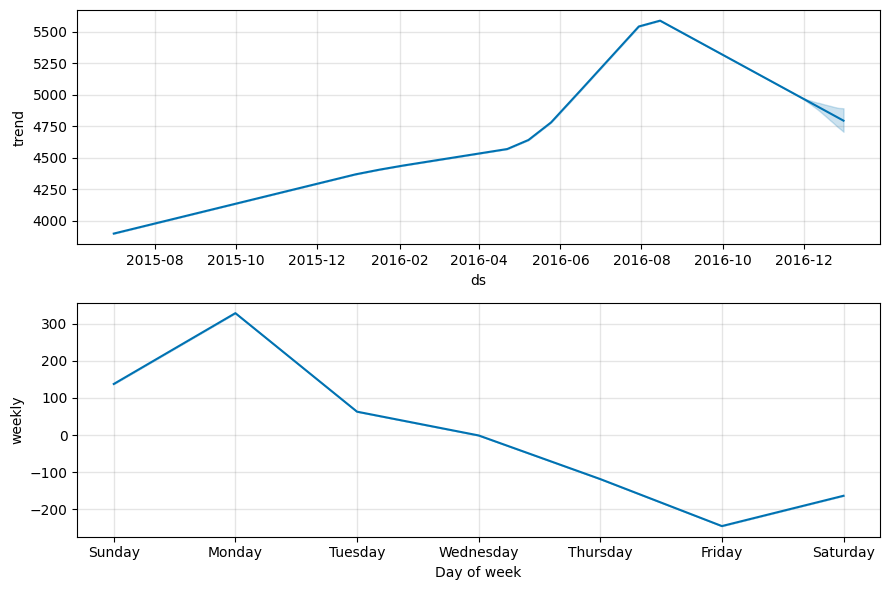

In [173]:
# As expected, prophet could find trend and weekly seasonality
fbmodel.plot_components(prophet_forecast);

In [174]:
# Check how prophet did
performance(test_data["y"].values,prophet_forecast["yhat"][-35:].values)

RMSE :  472.786
MAE :  323.508
MAPE :  0.06


**Insights:**

Without exogenous variables and not much tweaking, it was able to find a model that predicts **average daily pages views with MAPE of ~5.9%**

# Prophet with campaign data

In [175]:
# prepare the data for using prophet
prophet_input = english_cliped.reset_index().rename(columns={"index":"ds","English":"y"})
prophet_input = prophet_input.merge(exog.reset_index(drop=True),left_index=True,right_index=True)
train_data,test_data = prophet_input.iloc[:-35],prophet_input.iloc[-35:]

In [176]:
# Trying to predict with 95% confidence intervals
fbmodel2 = Prophet(weekly_seasonality=True,interval_width=0.95)
fbmodel2.add_regressor("Exog")
fbmodel2.fit(train_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxt3p_4x6/jac_r2be.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxt3p_4x6/gu41oelg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85687', 'data', 'file=/tmp/tmpxt3p_4x6/jac_r2be.json', 'init=/tmp/tmpxt3p_4x6/gu41oelg.json', 'output', 'file=/tmp/tmpxt3p_4x6/prophet_modelqf3abhk3/prophet_model-20250210190634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:06:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:06:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [177]:
# Store the forecast
prophet_forecast2 = fbmodel2.predict(prophet_input)

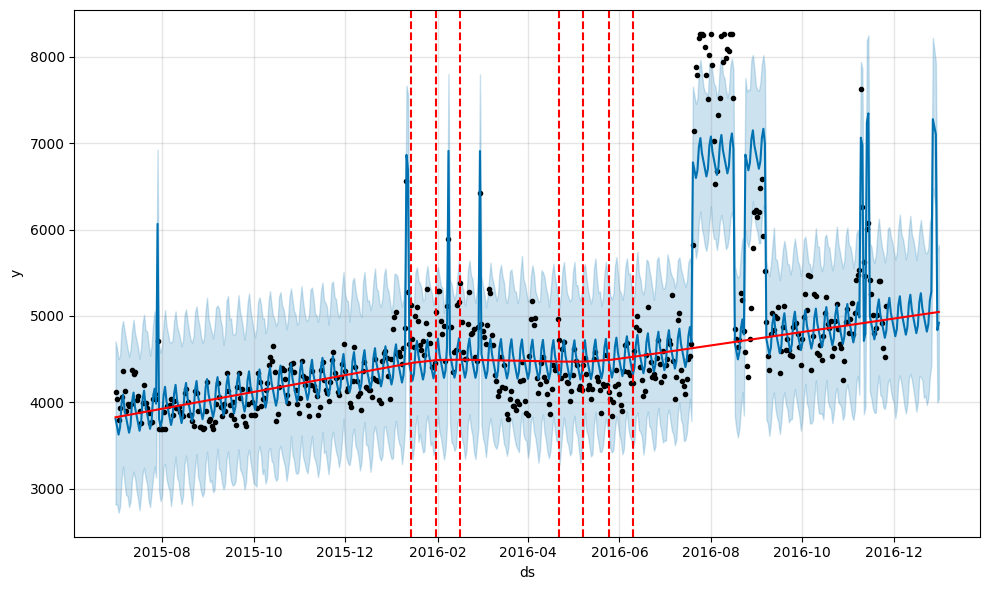

In [178]:
# Plot the changepoints, forecast along with confidence interval
fig = fbmodel2.plot(prophet_forecast2,uncertainty=True)
a = add_changepoints_to_plot(fig.gca(),fbmodel2,prophet_forecast2)

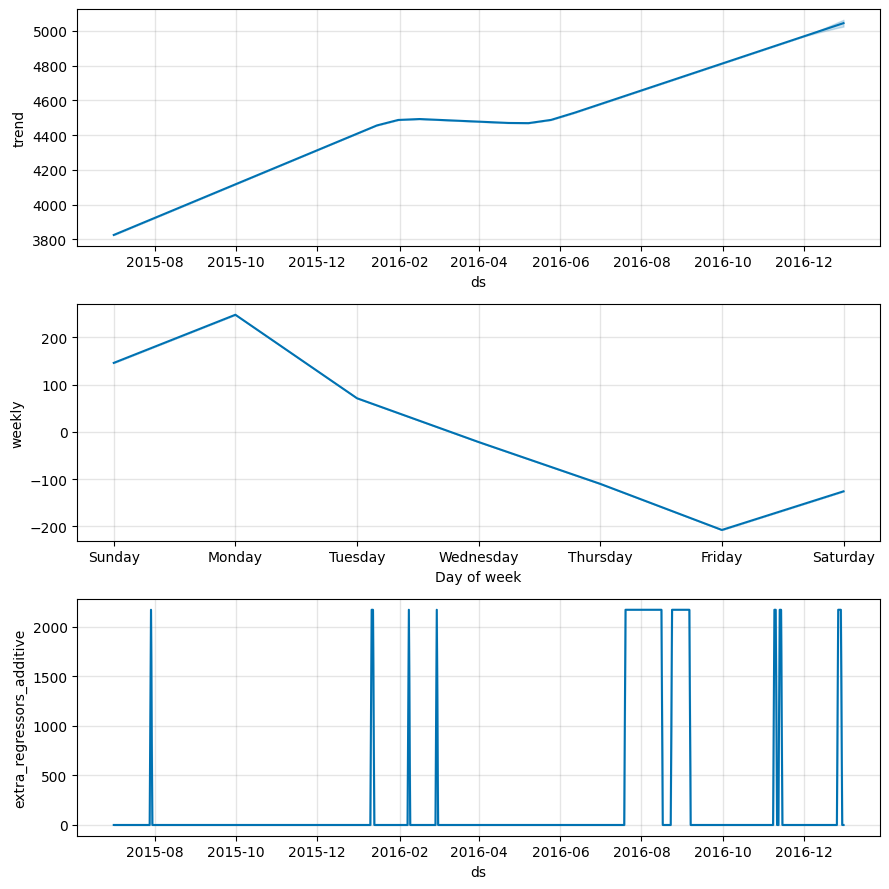

In [179]:

fbmodel2.plot_components(prophet_forecast2);

In [180]:
performance(test_data["y"].values,prophet_forecast2["yhat"][-35:].values)

RMSE :  404.193
MAE :  279.927
MAPE :  0.053


**Insights:**

Prophet with **campain** data is able to predict better. **MAPE of ~5%**

# Inferences :

There are also mediawiki & commons.wikimedia pages that host media are available in the dataset

Of the pages from 7 different languages, English has the highest proportion, closely followed by Japanese. Rest of the languages roughly have same proportion of ~12%

AccessOrigin is spider for ~24% of the pages and all-agents for ~76%

AccessType is all-acess for about 50% of the pages. Then for desktop & mobile-web is ~25% each

During the months of August 2016, there is a spike in daily average views of both English & Russian pages

Also, a spike is observed in Nov,2016. This time for pages in Spanish, Russian, and German as well

English average views seem to have trend & seasonality where as other languages have seasonality mostly

In daily median views, Spanish language pages seem to be higher than other language pages

Spanish, Russian, and English median daily views had a drop.

In later months of 2016, english pages median daily views is on part with that of Spanish

# Recommendations:

**Target English Pages for Ads:** Since English pages have the highest average daily views compared to other languages, running more ads on these pages could yield better results and engagement.

**Focus on All-Access Pages:** More than 50% of the pages fall under the "all-access" category compared to desktop or mobile-web views alone. This indicates that broader access methods should be considered for maximizing visibility.

**Enhance Training Data with Additional Language Support:** Including language data from mediawiki and commons.wikimedia could enrich the training data and improve model performance.

**Leverage Exogenous Data for Better Predictions:** Just as campaign data improved predictions for English pages, gathering and incorporating similar exogenous data for other languages could enhance the accuracy of the model.

**Experiment with Prophet for Further Improvements:** With additional time and resources, experimenting with Prophet parameters may further reduce MAPE values and improve forecasting accuracy.

